<center>
    <h3>Tarea 1</h3>
    <h4>*INF-493. Machine Learning.*</h4>
    <h1>Métodos Lineales para Regresión</h1>
</center>
<br>
<br>

<center>*Autor: David Frankenberg*</center>
<center>*email:* <david.frankenberg@alumnos.usm.cl></center>
<center>*rol: 201173554-4*</center>

## 1 Regresión Lineal Ordinaria (LSS)

In [97]:
import pandas as pd
import numpy as np

url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'

df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)

istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)

df = df.drop('train', axis=1)

**a)** Las líneas de la 5 a la 9 se detallan continuación: 
```python
5. df = df.drop('Unnamed: 0', axis=1)
6. strain_str = df['train']
7. istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
8. istest = np.logical_not(istrain) 
9. df = df.drop('train', axis=1)
```
Ahora procederemos a explicar las líneas paso a paso:

* La línea 5 asigna a `df` un nuevo dataframe que es igual al `df` original pero sin la columna correspondiente a la etiqueta `'Unnamed: 0'`. 
* La línea 6 extrae la columna con la etiqueta `train` y se la asigna a la variable `strain_str`. 
* La línea 7 genera un array que es almacenado en la variable `istrain`, donde los elementos de la variable `strain_str` son convertidos en variables booleanas, siendo `True` para `T` y `False` para `F`.
* La línea 8 niega los argumentos lógicos contenidos en `istrain`, es decir cambia los valores `True` por `False` y viceversa.
* La línea 9 al igual que la 5, asigna a `df` un nuevo dataframe que es igual al `df` anterior pero sin la columna correspondiente a la etiqueta `'train'`. 

**b)** A continuación, procedemos a describir el dataframe construido en el bloque que código superior, asignado a la variable `df`.

In [98]:
df.shape

(97, 9)

Lo anterior significa que nuestro dataframe es una matriz de 97 filas (o registros) y 9 columnas (o atributos)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


El método `info()` nos retorna el tipo de dato correspondiente a cada atributo del dataframe, así como el total de filas y columnas de la matriz y la memoria total utilizada por esta. 

In [100]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


El método `describe()` nos retorna una tabla con información estadística de cada uno de los atributos del dataframe. Esta información incluye, cantidad de registros, promedio, desviación estándar, mínimo, máximo y percentiles.

**C)** Ahora normalizamos los datos

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']

La importancia de normalizar la data radica en que para la ejecución de nuestros algoritmos es deseable que todas nuestras características se encuentren en la misma escala, ya que, si existen diferencias muy significativas de escala entre características, estas podrían incidir fuertemente en la predicción del modelo, solamente basadas en su magnitud. 

**d)** Regresion Lineal.

In [102]:
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1] # quitamos el ultimo atributo
N = X.shape[0] # revisamos la cantidad de registros
X.insert(X.shape[1], 'intercept', np.ones(N)) # inserta una columna de unos llamada intercepto que contiene unos
y = df_scaled['lpsa'] # asigna a y a la columna lpsa de df_scaled
Xtrain = X[istrain] # asigna los elementos de entrenamiento
ytrain = y[istrain] # asigna los elementos de entrenamiento
Xtest = X[np.logical_not(istrain)] # asigna los elementos del conjunto de prueba
ytest = y[np.logical_not(istrain)] # asigna los elementos del conjunto de prueba
linreg = lm.LinearRegression(fit_intercept = False) #realizamos la regresion 
linreg.fit(Xtrain, ytrain) #se realiza el ajuste con los sets de entrenamiento

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

La importancia del paso 3 dada por la línea:
```python
3. N = X.shape[0]
```
Viene dada, porque nos permite conocer la cantidad de registros que contiene X, esta información es relevante ya que en el siguiente paso dado por la línea 4.
```python
4. X.insert(X.shape[1], intercept, np.ones(N))
```
Se inserta la columna del intercepto que corresponde a un arreglo de dimensión N que en su interior contiene solamente unos (para este caso) y se agrega como columna a X. La importancia de este paso viene dada por la necesidad de dar un intercepto lógico a los predictores ya que sin estos podría ser imposible interpretar la constante de la regresión${^1}$.   


1. Fuente: http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-the-constant-y-intercept

**e)** Tabla de *pesos* y *Z-score*.

In [103]:
#for column in df:
#    mean, sigma = df[column].mean(), df[column].std()
from scipy import linalg, dot

print("Pesos:")
print(linreg.coef_)
print("\n")

N = len(Xtrain)
p = Xtrain.shape[1]

sigma = np.sqrt(1/(N-p-1)* np.sum(np.square(ytrain)- np.square(linreg.predict(Xtrain))))
v_j = np.sqrt(np.diag(linalg.inv(dot(Xtrain.transpose(), Xtrain))))

zScores = np.divide(linreg.coef_, sigma*v_j)

print("Z-Scores:")
print(zScores)


Pesos:
[ 0.67601634  0.26169361 -0.14073374  0.20906052  0.30362332 -0.28700184
 -0.02119493  0.26557614  2.46493292]


Z-Scores:
[  5.31982819   2.72697258  -1.38382296   2.03804576   2.44787594
  -1.85074859  -0.14541122   1.72279321  27.35925314]


A continuación, presentamos la tabla con los valores obtenidos (Truncados al tercer decimal): 

| Predictor   |     Peso |  Z-Score |
|------------:|---------:|---------:|
|    *lcavol* |  $0.676$ |   $5.319$|
|   *lweight* |  $0.261$ |  $2.726$ |
|       *age* | $-0.140$ | $-1.383$ |
|      *lbph* |  $0.209$ |  $2.038$ |
|       *svi* |  $0.303$ |  $2.447$ |
|       *lcp* | $-0.287$ | $-1.850$ |
|   *gleason* | $-0.021$ | $-0.145$ |
|     *pgg45* |  $0.265$ |  $1.722$ |
|      *lpsa* |  $2.464$ | $27.359$ |

El Z-Score mide el efecto de quitar una variable del modelo, un Z-Score más grande que 2 en valor absoluto es aproximadamente al 5% de significación. Por lo tanto, para todas las variables inferiores a 2 no existen evidencia suficiente que demuestre la relación con la respuesta, esas variables son: *age, lcp, gleason y pgg45*.

**f)** Estimación del error de predicción usando validación cruzada. 

In [104]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

from sklearn import cross_validation

for i in range(5, 11, 5):

    Xm = Xtrain.as_matrix()
    ym = ytrain.as_matrix()
    k_fold = cross_validation.KFold(len(Xm),i)
    mse_cv = 0
    for k, (train, val) in enumerate(k_fold):
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(Xm[train], ym[train])
        yhat_val = linreg.predict(Xm[val])
        mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
        mse_cv += mse_fold
    mse_cv = mse_cv / 10
    
    print("Para K = {} -> MSE = {:f}".format(i, mse_cv))
print("-------------------------------------")
print("Error real MSE = {:f}".format(mse_test))

Para K = 5 -> MSE = 0.478257
Para K = 10 -> MSE = 0.757237
-------------------------------------
Error real MSE = 0.521274


Del procedimiento anterior se observa que el error aumenta al duplicar el número de folds $(K)$, sin embargo, para un valor de $K = 5$ observamos que el error disminuye con respecto al valor real del modelo y para $K = 10$ es superior al error real del modelo. Por lo tanto, creemos que este fenómeno se debe a un problema de sobreajuste para la variante $K = 10$. 

**j)** Errores de predicción.

> Fuente: http://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

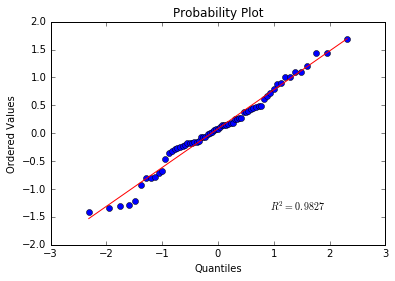

In [105]:
%matplotlib inline

import pylab 
import scipy.stats as stats

error = ytrain - linreg.predict(Xtrain) 
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

Como podemos observar, con un coeficiente de determinación de $0.9827$ podemos afirmar con un gran grado de certeza que es razonable asumir normalidad sobre los residuos del modelo. 

## 2 Selección de Atributos (LSS)

**a)** Implementación de Foward Step-wise Selection (FSS).

In [80]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)

        selected.append(best_candidate)
        print("selected = {0!s} ...".format(names_x[best_candidate]))
        print("totalvars={:d}, mse = {:f}".format(len(indexes), best_new_score))
    return selected

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
fss(Xm,ym,names_regressors)

selected = Lcavol ...
totalvars=2, mse = 0.664606
selected = Lweight ...
totalvars=3, mse = 0.553610
selected = Svi ...
totalvars=4, mse = 0.521011
selected = Lbph ...
totalvars=5, mse = 0.489776
selected = Pgg45 ...
totalvars=6, mse = 0.478648
selected = Lcp ...
totalvars=7, mse = 0.455818
selected = Age ...
totalvars=8, mse = 0.439363
selected = Gleason ...
totalvars=9, mse = 0.439200


[8, 0, 1, 4, 3, 7, 5, 2, 6]

**b)** Implementación de Backward Step-wise Selection (BSS).

In [56]:
############# FALTA MODIFICARLO #####################
def bss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)

        selected.append(best_candidate)
        print("selected = {0!s} ...".format(names_x[best_candidate]))
        print("totalvars={:d}, mse = {:f}".format(len(indexes), best_new_score))
    return selected

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
bss(Xm,ym,names_regressors)

selected = Lcavol ...
totalvars=2, mse = 0.664606
selected = Lweight ...
totalvars=3, mse = 0.553610
selected = Svi ...
totalvars=4, mse = 0.521011
selected = Lbph ...
totalvars=5, mse = 0.489776
selected = Pgg45 ...
totalvars=6, mse = 0.478648
selected = Lcp ...
totalvars=7, mse = 0.455818
selected = Age ...
totalvars=8, mse = 0.439363
selected = Gleason ...
totalvars=9, mse = 0.439200


[8, 0, 1, 4, 3, 7, 5, 2, 6]

## 3 Regularización

**a)** Ridge Regression.

(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)


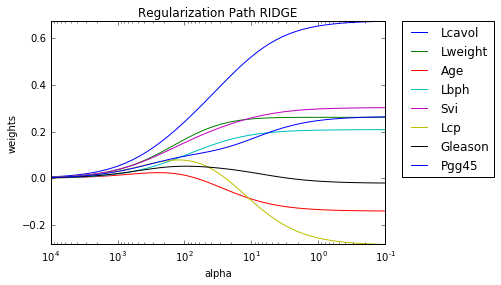

In [81]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    print(alphas_.shape) 
    print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Regularization Path RIDGE")
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

El grafico anterior describe cómo *Ridge Regression* disminuye la importancia en el modelo de aquellas variables que no están suficientemente relacionadas con la respuesta. Estas variables tal y como vimos en el punto **1 e)** son *age, lcp, gleason y pgg45* es decir aquellas variables que poseían un Z-Score inferior a 2. Cabe destacar que a medida que aumenta *alpha* se observa la variable que más peso gana es Lcavol por lo que es esta la que mayor impacto tendrá en el modelo.

**b)** Lasso.

(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)


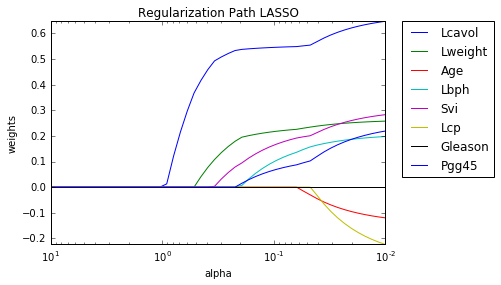

In [95]:
from sklearn.linear_model import Lasso

X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    print(alphas_.shape) 
    print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Regularization Path LASSO")
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Del grafico anterior se observa que *Lasso* es mucho más agresivo a la hora de eliminar variables del modelo que *Ridge*, además de dar todavía más relevancia a las características más significativas del modelo. Una curiosidad es que *Lasso* elimina la característica *Gleason* sin importar el *Alpha* que se tome. 

La descripción anterior nos lleva a pensar que efectivamente *Lasso* es más eficiente que *Ridge* a la hora de elegir atributos, ya que su criterio de discriminación es más fuerte que en el caso anterior. 


**c)** Error Ridge Regression.

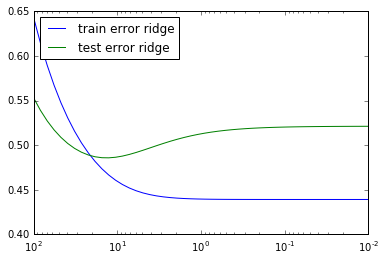

In [60]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

El grafico anterior presenta un escenario indeseable ya que para valores de *alpha* inferiores a aproximadamente 10, el error del *test* supera por amplio margen al error de *entrenamiento*, lo que es contrario al objetivo del aprendizaje que busca mantener controlado el error del *test*.

Sin embargo, observamos que el valor del error de *entrenamiento* permanece constante para estos valores (aproximadamente 0.45) lo que nos lleva a pensar que estamos en presencia de un fenómeno de sobreajuste.


**d)** Error Lasso.

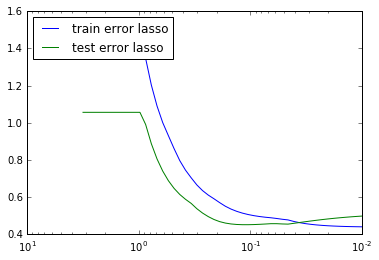

In [107]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Tal y como conjeturamos en el apartado **b)** este grafico nos señala que recién para valores inferiores a  aproximadamente $10^{-1}$ el error del set de *test* supera al error de *entrenamiento*, lo que es favorable ya que significa que para valores superiores a este el error de *test* será menor. Por lo que *Lasso* es mejor para este caso. 

**e)** Estimación de parámetro de regularización.

In [65]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                                    for train, val in k_fold]
if np.mean(mse_list_k10) < best_cv_mse:
    best_cv_mse = np.mean(mse_list_k10)
    best_alpha = a
    print("BEST PARAMETER={:f}, MSE(CV)={:f}".format(best_alpha,best_cv_mse))

BEST PARAMETER=100.000000, MSE(CV)=1.795596


## 4 Predicción de Utilidades de Películas

**a)** Creación de dataframes.

**b)** Construcción del modelo lineal.